## Solución del problema

### 1.Instalación e importación de librerias

In [184]:
"""# Manejo de gráficas
%pip install scikit-plot
# Manejo de gráficas
%pip install scikit-plot
#Manejo de lemmatization spanish
%pip install stanza
#!{sys.executable} -m pip install pandas-profiling
"""
#Solo ejecutar si no se tiene instalado

'# Manejo de gráficas\n%pip install scikit-plot\n# Manejo de gráficas\n%pip install scikit-plot\n#Manejo de lemmatization spanish\n%pip install stanza\n#!{sys.executable} -m pip install pandas-profiling\n'

In [185]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ascas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [186]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
#nltk.download('wordnet')
import stanza
stanza.download('es') # descarga el modelo de lematización en español


2024-04-07 16:55:27 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-07 16:55:27 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-07 16:55:31 INFO: File exists: C:\Users\ascas\stanza_resources\es\default.zip
2024-04-07 16:55:36 INFO: Finished downloading models and saved to C:\Users\ascas\stanza_resources


In [187]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-07 16:55:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-07 16:55:37 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-07 16:55:37 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-07 16:55:37 INFO: Using device: cpu
2024-04-07 16:55:37 INFO: Loading: tokenize
2024-04-07 16:55:37 INFO: Loading: mwt
2024-04-07 16:55:37 INFO: Loading: pos
2024-04-07 16:55:38 INFO: Loading: lemma
2024-04-07 16:55:38 INFO: Done loading processors!


In [188]:

import pandas as pd
import numpy as np
import sys

#Usados en el proyecto 1
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
######################################

import re, string, unicodedata

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Perfilamiento y entendimiento de los datos

In [189]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [190]:
data_train

Review  Class
0     Muy buena atención y aclaración de dudas por p...      5
1     Buen hotel si están obligados a estar cerca de...      3
2     Es un lugar muy lindo para fotografías, visite...      5
3     Abusados con la factura de alimentos siempre s...      3
4     Tuvimos un par de personas en el grupo que rea...      3
...                                                 ...    ...
7870  Me parece buen sistema, agiliza el transporte,...      4
7871  Fue una escapada de un día desde el complejo, ...      4
7872  La Plaza de la Revolución es un lugar emblemát...      3
7873  Es la segunda ocasión que me quedo en los cuar...      1
7874  Llegamos por casualidad a Los Mercaderes, un g...      5

[7875 rows x 2 columns]

In [191]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


#### 2. Entendimiento de los datos

In [192]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(textos):
    for i in textos['Review']: 
        dict = {}
        for x in i.split(' '): 
            print(i)
        
            if x in dict.keys():
                dict[x] += 1
            else:
                dict[x] = 1

        max_key = max(dict, key=dict.get)
        print(max_key)


moda(textos)
"""

#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Max tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]


def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras

def moda(texto):

    dict = {}
    for x in texto.split(' '):
    
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1

    max_key = max(dict, key=dict.get)
    return str(max_key)


textos['moda'] = [moda(i) for i in textos['Review']]



In [193]:
"""#Codigo para guardar los lemas en csv
textos.to_csv('sinProcesar.csv')"""


"#Codigo para guardar los lemas en csv\ntextos.to_csv('sinProcesar.csv')"

##### Obtención de las palabras más frecuentes 
A través de este análisis se obtienen las palabras más frecuentes en todos los reviews previo al procesamiento de los mismos

In [194]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)

df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

Vemos las palabras más frecuentes en el siguiente gráfico

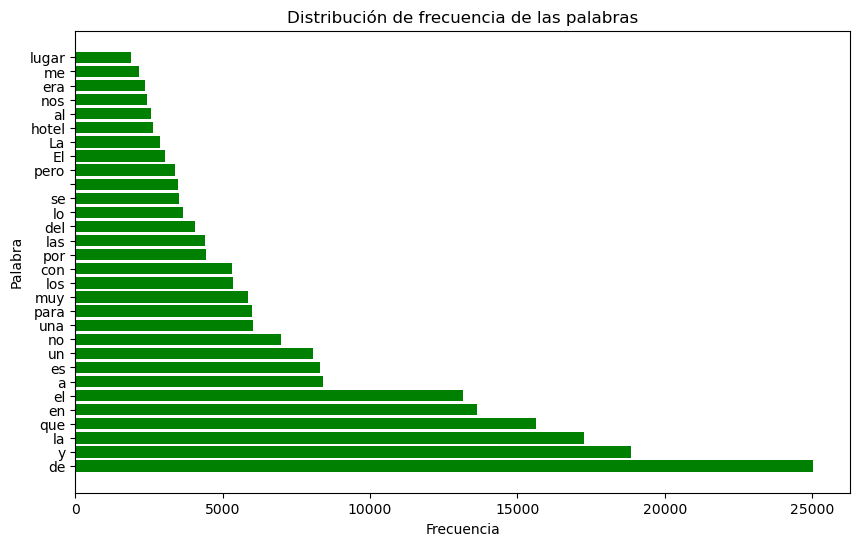

In [195]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

Vemos las palabras menos frecuentes en el siguiente gráfico

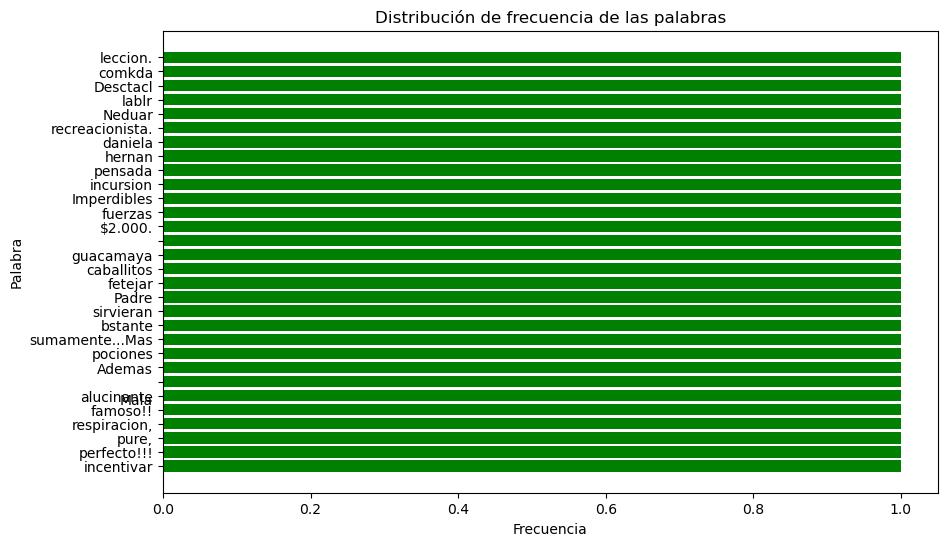

In [196]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [197]:
textos

Review  Class  Conteo  Max  \
0     Muy buena atención y aclaración de dudas por p...      5     252   20   
1     Buen hotel si están obligados a estar cerca de...      3     297   13   
2     Es un lugar muy lindo para fotografías, visite...      5     104   12   
3     Abusados con la factura de alimentos siempre s...      3     422   14   
4     Tuvimos un par de personas en el grupo que rea...      3     419   14   
...                                                 ...    ...     ...  ...   
7870  Me parece buen sistema, agiliza el transporte,...      4     113   11   
7871  Fue una escapada de un día desde el complejo, ...      4     261   12   
7872  La Plaza de la Revolución es un lugar emblemát...      3     777   14   
7873  Es la segunda ocasión que me quedo en los cuar...      1     651   12   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5     252   11   

      Min moda  
0       0       
1       1   de  
2       1   Es  
3       1    y  
4       1   el  
...   ...  ...  
7870    2   el  
7871    2   de  
7872    1   de  
7873    0  que  
7874    1    a  

[7875 rows x 6 columns]

In [198]:
import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.2 Preparación de los datos

##### 2.2.1 Limpieza de los datos

##### 2.2.1.1 Duplicados

In [199]:
textos.duplicated(keep = False).sum()

102

In [200]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

##### 2.2.1.2 Eliminación de números
Se hace uso de expresiones regulares con el objetivo de eliminar los diferentes formates de números que se pueden encontrar en el texto. 

In [201]:
#Quitar los números
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

Se definen rutinas de preprocesamiento que se recopilan en la rutina preprocessing() y softPreprocessing(), la segunda rutina se aplica previo a la aplicación de lemmatización con el fin de obtener mejores resultados y tras lemmatizar si se aplica preprocessing()

In [202]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    own = ['ser','haber','tener','ir','poder','hacer','hotel','pedir','llegar','mas','habitacion','habitación',
           'decir','lugar','dia','alguno','dar','querer','comida','ver','vista','despue',
           'un','dos','tres','cuatro','cuc','adema','buen']
    new_words = []
    for word in words:
        if word not in spanish_stopwords and word not in own:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

def getString(list): 
    string = ""
    for w in list: 
        string += w + " "
    return string



def softPreprocessing(words):
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    getString(words)
    return getString(words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

##### 2.2.1.3 SoftPreprocessing
Aplicación de softpreprocessing para poder ejecutar el lemmatizer(), en esto lo único que se hace es dejar todas las palabras en minusculas y eliminar caracteres no ascii para que lemmatizer de Stanza no se confunda

In [203]:
textos['tokens'] = [i.split(' ') for i in textos['Review']]
textos['tokens'] = textos['tokens'].apply(softPreprocessing)#Se aplica un preprocesamiento muy tranqui

textos.iloc[1201]['tokens']

'lugar especial para un atardecer o para conocer como son los cubanos y cubanas, autentico y romantico. inicio y fin de muchas cosas: el amor, la aventura, la ciudad y el mar. '

##### 2.2.2 Lemmatizer - Normalización
Se aplica un lemmatizer que transforma el texto en su lema (sujeto + verbo + predicado), esto permite por un lado reducir las palabras relevantes similares y por otro lado se obtiene una mejor puntuación respecto a no aplicarlo. Esta prueba de que daba mejor se explica mejor en el documento. 

Cabe resaltar que el Lemmatizer se demora ejecuntado un aproximado de 1h 20 min por esa razón se comenta y se guarda ese archivo en el csv lemaSoftProcessing.csv para posteriormente recuperarlo sin necesidad de ejeutarlo de nuevo. 


In [204]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos.to_csv('lemaSoftProcessing.csv')"""


"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSoftProcessing.csv')"

In [205]:

from ast import literal_eval
textosLemas = pd.read_csv('lemaSoftProcessing.csv', sep=',', encoding = 'utf-8')
textosLemas.iloc[1201]
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)
#print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas['tokens'] = textosLemas['tokens'].apply(getString)
print(textosLemas['tokens'])

0       mucho buen atencion y aclaracion de duda por p...
1       buen hotel si estar obligado a estar cerca de ...
2       ser uno lugar mucho lindo para fotografia , vi...
3       abusado con el factura de alimento siempre él ...
4       tener uno par de persona en el grupo que realm...
                              ...                        
7797    yo parecer buen sistema , agilizar el transpor...
7798    ser uno escapada de uno dia desde el complejo ...
7799    el plaza de el revolucion ser uno lugar emblem...
7800    ser el segundo ocasion que yo quedar en el cua...
7801    llegar por casualidad a el mercader , uno grup...
Name: tokens, Length: 7802, dtype: object


#### 2.2.3 Tokenización

Se utiliza WordPunctTokenizer dado que el idioma español no presenta contracciones y este Tokenizer es más robusto frente a los signos de puntuación. 

In [206]:

textosLemas['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas['tokens']]
    
textosLemas['tokens'].iloc[1201]

['lugar',
 'especial',
 'para',
 'uno',
 'atardecer',
 'o',
 'para',
 'conocer',
 'como',
 'ser',
 'el',
 'cubano',
 'y',
 'cubano',
 ',',
 'autentico',
 'y',
 'romantico',
 '.',
 'inicio',
 'y',
 'fin',
 'de',
 'mucho',
 'cosa',
 ':',
 'el',
 'amor',
 ',',
 'el',
 'aventura',
 ',',
 'el',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [207]:
textosLemas['tokens'].dropna()

0       [mucho, buen, atencion, y, aclaracion, de, dud...
1       [buen, hotel, si, estar, obligado, a, estar, c...
2       [ser, uno, lugar, mucho, lindo, para, fotograf...
3       [abusado, con, el, factura, de, alimento, siem...
4       [tener, uno, par, de, persona, en, el, grupo, ...
                              ...                        
7797    [yo, parecer, buen, sistema, ,, agilizar, el, ...
7798    [ser, uno, escapada, de, uno, dia, desde, el, ...
7799    [el, plaza, de, el, revolucion, ser, uno, luga...
7800    [ser, el, segundo, ocasion, que, yo, quedar, e...
7801    [llegar, por, casualidad, a, el, mercader, ,, ...
Name: tokens, Length: 7802, dtype: object

#### 2.2.4 Eliminación de ruido
Esta eliminación del ruido implica eliminar aquello asociado a mayusculas, eliminación de puntuación y de elementos NO ascii una vez se ha procesado el texto mediante Stanza. De igual manera uno de los pasos más fundamentales de eliminación de ruido implica eliminar las stop words que no sirven para el modelo 

In [208]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas.head()

Unnamed: 0                                             Review  Class  len  \
0           0  Muy buena atención y aclaración de dudas por p...      5  252   
1           1  Buen hotel si están obligados a estar cerca de...      3  297   
2           2  Es un lugar muy lindo para fotografías, visite...      5  104   
3           3  Abusados con la factura de alimentos siempre s...      3  422   
4           4  Tuvimos un par de personas en el grupo que rea...      3  419   

   Max  Min                                             tokens  
0   20    0  [atencion, aclaracion, duda, parte, senorita, ...  
1   13    1  [si, obligado, cerca, centro, convención, rest...  
2   12    1  [lindo, fotografia, visitar, selina, musica, v...  
3   14    1  [abusado, factura, alimento, siempre, echar, c...  
4   14    1  [par, persona, grupo, realmente, comer, cabrit...

In [209]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

Unnamed: 0                                             Review  Class  len  \
0           0  Muy buena atención y aclaración de dudas por p...      5  252   
1           1  Buen hotel si están obligados a estar cerca de...      3  297   
2           2  Es un lugar muy lindo para fotografías, visite...      5  104   
3           3  Abusados con la factura de alimentos siempre s...      3  422   
4           4  Tuvimos un par de personas en el grupo que rea...      3  419   

   Max  Min                                             tokens  
0   20    0  atencion aclaracion duda parte senorita veroni...  
1   13    1  si obligado cerca centro convención restaurant...  
2   12    1  lindo fotografia visitar selina musica vivo ce...  
3   14    1  abusado factura alimento siempre echar culpa b...  
4   14    1  par persona grupo realmente comer cabrito rest...

#### 2.2.5 Normalización

En este caso solo se presenta el stemming para demostrar que feu un paso que se implementó en el análisis sin embargo se prefiere dejar el lemmatizer ya que el alogritmo es mucho más robusto y no se pierde el significado de las palabras

In [210]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

### 3. División en conjuntos train y test y validación
Se divide el conjunto de datos en train y test. El train se subdivide en  train y validation (val). 

In [211]:

x_train, x_test_completo = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test_completo.shape)
x_train_completo = x_train
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test_completo.shape,x_train.shape, x_val.shape)


(4291, 7) (3511, 7)
(3511, 7) (3218, 7) (1073, 7)


In [212]:
x_train_final = x_train.loc[x_train['Class']==1]
size = len(x_train_final)
print(size)
x_train_final = pd.concat([x_train_final,x_train.loc[x_train['Class']==2].head(size)])
x_train_final = pd.concat([x_train_final,x_train.loc[x_train['Class']==3].head(size)])
x_train_final = pd.concat([x_train_final,x_train.loc[x_train['Class']==4].head(size)])
x_train_final = pd.concat([x_train_final,x_train.loc[x_train['Class']==5].head(size)])
x_train = x_train_final

320


#### 3.1 Segundo profile tras aplicación de preprocessing

##### 3.1.1 Nueva variable moda (encontrar palabra que se repite más por cada texto)

In [213]:
def moda(texto):

    dict = {}
    for x in texto.split(' '):
    
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1

    max_key = max(dict, key=dict.get)
    return str(max_key)


textosLemas['moda'] = [moda(i) for i in textosLemas['Review']]

In [214]:
textosLemas['modaTokens'] = [moda(i) for i in textosLemas['tokens']]

In [215]:
textosLemas['lenTokens']=[len(i)  for i in textosLemas['tokens']]
textosLemas['len']=[len(i)  for i in textosLemas['Review']]

In [216]:
#Max tiene el máximo tamaño de la palabra
textosLemas['MaxTokens'] = [[max([len(x) for x in i.split(' ')])][0] for i in textosLemas['tokens']]
#Max tiene el minimo tamaño de la palabra
textosLemas['MinTokens'] = [[min([len(x) for x in i.split(' ')])][0] for i in textosLemas['tokens']]


In [217]:
textosLemas

Unnamed: 0                                             Review  Class  \
0              0  Muy buena atención y aclaración de dudas por p...      5   
1              1  Buen hotel si están obligados a estar cerca de...      3   
2              2  Es un lugar muy lindo para fotografías, visite...      5   
3              3  Abusados con la factura de alimentos siempre s...      3   
4              4  Tuvimos un par de personas en el grupo que rea...      3   
...          ...                                                ...    ...   
7797        7870  Me parece buen sistema, agiliza el transporte,...      4   
7798        7871  Fue una escapada de un día desde el complejo, ...      4   
7799        7872  La Plaza de la Revolución es un lugar emblemát...      3   
7800        7873  Es la segunda ocasión que me quedo en los cuar...      1   
7801        7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

      len  Max  Min                                             tokens moda  \
0     252   20    0  atencion aclaracion duda parte senorita veroni...        
1     297   13    1  si obligado cerca centro convención restaurant...   de   
2     104   12    1  lindo fotografia visitar selina musica vivo ce...   Es   
3     421   14    1  abusado factura alimento siempre echar culpa b...    y   
4     419   14    1  par persona grupo realmente comer cabrito rest...   el   
...   ...  ...  ...                                                ...  ...   
7797  113   11    2  parecer sistema agilizar transporte conectar m...   el   
7798  261   12    2  escapada complejo grupo turista guia informado...   de   
7799  776   14    1  plaza revolucion emblematico identificar haban...   de   
7800  649   12    0  segundo ocasion quedar cuarto area jardin como...  que   
7801  252   11    1  casualidad mercader grupo grande varios famili...    a   

      modaTokens  lenTokens  MaxTokens  MinTokens  
0          parte        151         11          4  
1             si        172         12          2  
2          lindo         61         10          4  
3        factura        252         12          2  
4      realmente        222          9          3  
...          ...        ...        ...        ...  
7797     parecer         71         10          5  
7798    escapada        112         11          3  
7799        alli        440         14          2  
7800      cuarto        348         11          3  
7801  casualidad        140         10          4  

[7802 rows x 12 columns]

In [218]:
def frecuenciaPalabrasModa(palabras):
    frecuenciaPalabras = {}
    
    for p in palabras: 
        if p in frecuenciaPalabras.keys():
            frecuenciaPalabras[p] += 1
        else:
            frecuenciaPalabras[p] = 1
    print(frecuenciaPalabras)
    return frecuenciaPalabras


In [219]:
dictFrec = frecuenciaPalabrasModa(textosLemas['moda'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)

df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'': 261, 'de': 2033, 'Es': 29, 'y': 974, 'el': 412, 'que': 650, 'no': 103, 'la': 796, 'a': 111, 'historia,': 1, 'hotel': 19, 'en': 433, 'Todo': 2, 'para': 81, 'un': 161, 'con': 81, 'En': 4, 'muy': 245, 'era': 18, 'Me': 10, 'Llegamos': 1, 'se': 28, 'Tomé': 1, 'Nunca': 2, 'Bogotá': 2, 'son': 14, 'Una': 6, 'los': 58, 'Puedes': 1, 'ir': 2, 'Muy': 24, 'De': 2, 'me': 19, 'te': 11, 'El': 32, 'buena': 8, 'venden': 1, 'Hermosos': 1, 'este': 6, 'Sercicio': 1, 'estaba': 3, 'es': 254, 'las': 41, 'Siento': 1, 'mi': 6, 'No': 19, 'gran': 1, 'sobre': 1, 'Ambiente': 1, 'tomar': 2, 'Sin': 2, 'Excelentes': 2, 'La': 48, 'lugar': 23, 'del': 34, 'pero': 18, 'excelente.': 1, 'Buenas': 2, 'Visita': 1, 'por': 48, 'Asombroso.': 1, ',': 32, 'ruinas': 1, '...': 6, 'Esto': 2, 'Museo': 3, 'lá': 1, 'Excelente': 28, 'una': 54, 'k': 1, 'cada': 2, 'pequeñas': 1, 'mejor': 5, 'quizás': 1, 'x': 1, 'Los': 4, 'ver': 2, 'tradicional': 1, 'edificio': 1, 'más': 6, 'Renombrado': 1, 'arquitectura,': 1, 'desde': 3, 'Gracias': 1,

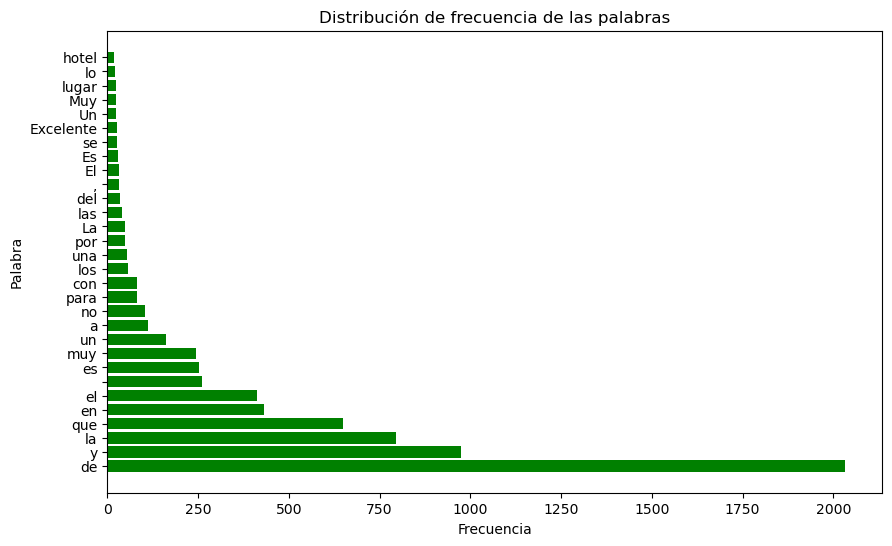

In [220]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

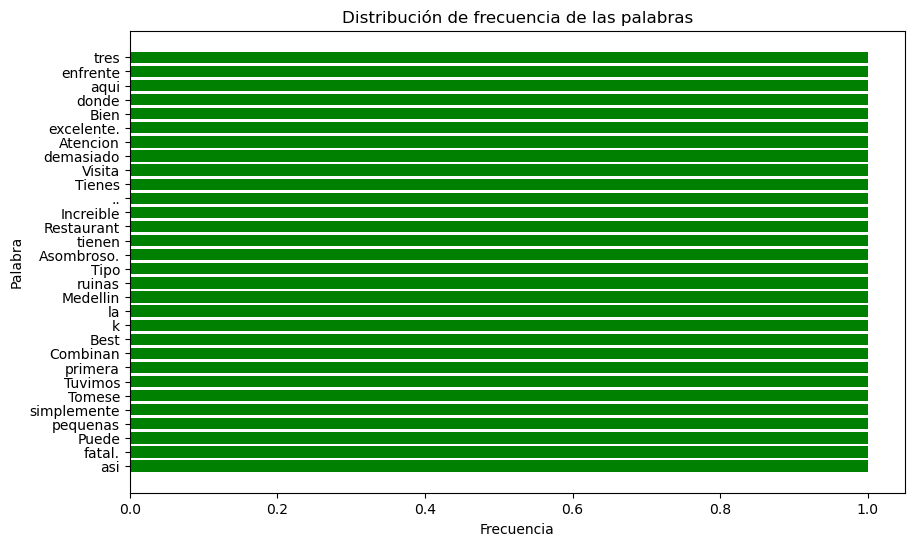

In [221]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [222]:
#Codigo para guardar los lemas en csv
textosLemas.to_csv('./DatosProcesados/resultadoProcesamiento.csv')
textosLemasSolos = textosLemas[['tokens','Class']]
textosLemasSolos.to_csv('./DatosProcesados/resultadoProcesamientoSoloTokens.csv')

##### 3.1 Algunos gráficos sobre el conjunto en el que se va a crear el modelo

In [223]:
x_train

Unnamed: 0                                             Review  Class  \
7272        7343  Los ascensores  no funcionan, las habitaciones...      1   
6470        6531  Lobby sin aire acondicionado, con goteras a ch...      1   
3378        3396  Sitio es pobre no ofrece nada, mucha basura, m...      1   
5101        5141  No respetaron la reservacion, esperamos  minut...      1   
7300        7372  aunque la gente cola para comer aquí, no te de...      1   
...          ...                                                ...    ...   
830          831  Aunque estoy trabajando en Cuba mi estancia ha...      5   
3698        3720  Es obligatoria la camitada por las escolleras ...      5   
6030        6081  Visitar La Habana y no ir al Malecón es como n...      5   
474          474  Buen servicio, y medidas de seguridad uso de c...      5   
2299        2309  EL recorrido por el paseo Montejo es incompara...      5   

      len  Max  Min                                             tokens  
7272  260   12    0  ascensor funcionar plaga insecto cucaracha tam...  
6470  787   14    1  lobby aire acondicionado gotera chorro llover ...  
3378  106    9    2  sitio pobre ofrecer basura gente desorden puro...  
5101  124   12    1  respetar reservacion esperar minuto mejor rest...  
7300  366   12    1  aunque gente cola comer aqui enganar opción re...  
...   ...  ...  ...                                                ...  
830   205   12    1  aunque trabajar cuba estancia personal atender...  
3698  183   12    1  obligatorio camitado escollera atardecer roman...  
6030  144   10    1  visitar habana malecon gran ambiente atardecer...  
474   215   14    1  servicio medida seguridad uso cubrir boca gel ...  
2299  164   15    1  recorrido paseo montejo incomparable transport...  

[1600 rows x 7 columns]

##### 3.1.1 Tamaños en el conjunto train - Tokens

<Axes: xlabel='len', ylabel='Count'>

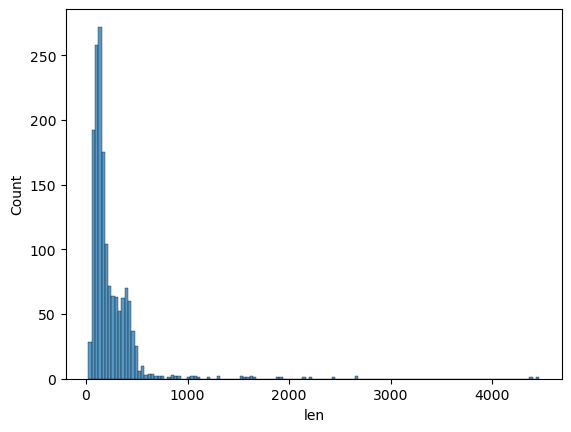

In [224]:
x_train['len']=[len(i)  for i in x_train['tokens']]

sns.histplot(x_train['len'])

##### 3.1.2 Tamaños en el conjunto train -Review

<Axes: xlabel='lenOriginal', ylabel='Count'>

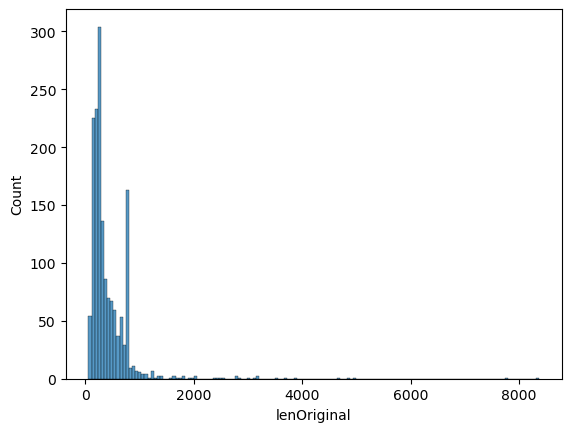

In [225]:
x_train['lenOriginal']=[len(i)  for i in x_train['Review']]
sns.histplot(x_train['lenOriginal'])

##### 3.1.3 Histograma por clase

<Axes: xlabel='Class', ylabel='Count'>

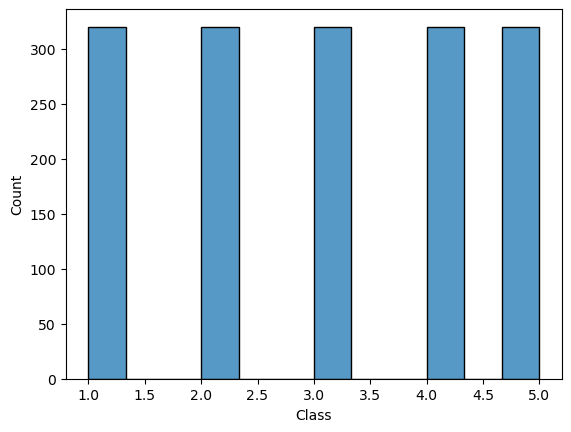

In [226]:
sns.histplot(x_train['Class'])

In [227]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [228]:

dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'atencion': 869, 'aclaracion': 2, 'duda': 363, 'parte': 632, 'senorita': 32, 'veronico': 1, 'castillo': 125, 'atento': 316, 'amable': 597, 'cuestion': 33, 'laborable': 1, 'ideal': 98, 'descansar': 108, 'limpieza': 263, 'ordenado': 37, 'restaurante': 1586, 'variedad': 225, 'si': 2437, 'obligado': 154, 'cerca': 411, 'centro': 494, 'convención': 13, 'necesitar': 287, 'mejorar': 175, 'frio': 143, 'cafe': 264, 'flojo': 13, 'monton': 251, 'pan': 66, 'persona': 736, 'servir': 270, 'uderstanding': 1, 'bu': 1, 'significar': 41, 'servicio': 2204, 'barrio': 66, 'opción': 187, 'deber': 700, 'especial': 274, 'lindo': 298, 'fotografia': 65, 'visitar': 920, 'selina': 2, 'musica': 338, 'vivo': 118, 'cerveza': 92, 'artesanal': 21, 'abusado': 1, 'factura': 79, 'alimento': 195, 'siempre': 537, 'echar': 39, 'culpa': 12, 'buscar': 199, 'rfc': 1, 'proporcionar': 60, 'independisar': 1, 'base': 38, 'registrado': 7, 'check': 153, 'in': 113, 'pasar': 856, 'aun': 250, 'nadade': 1, 'aunque': 536, 'hablar': 267, 

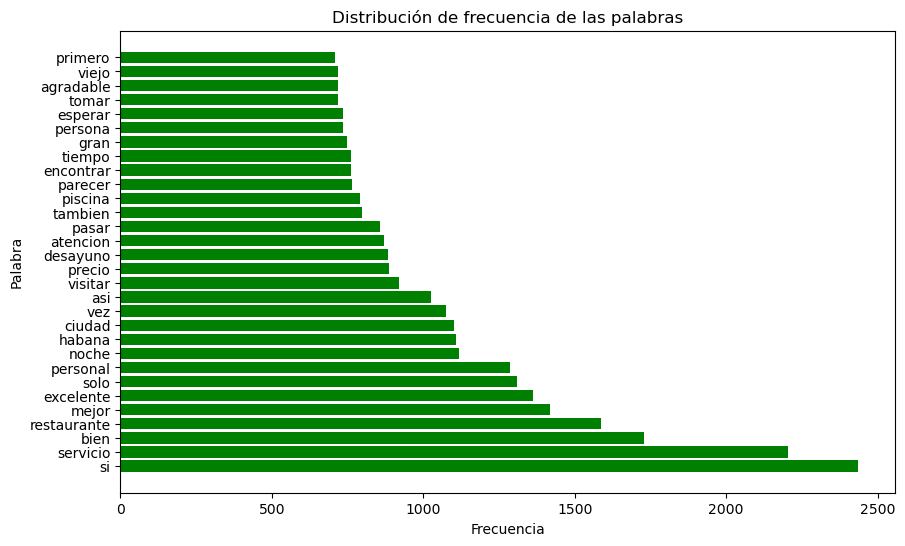

In [229]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)

fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

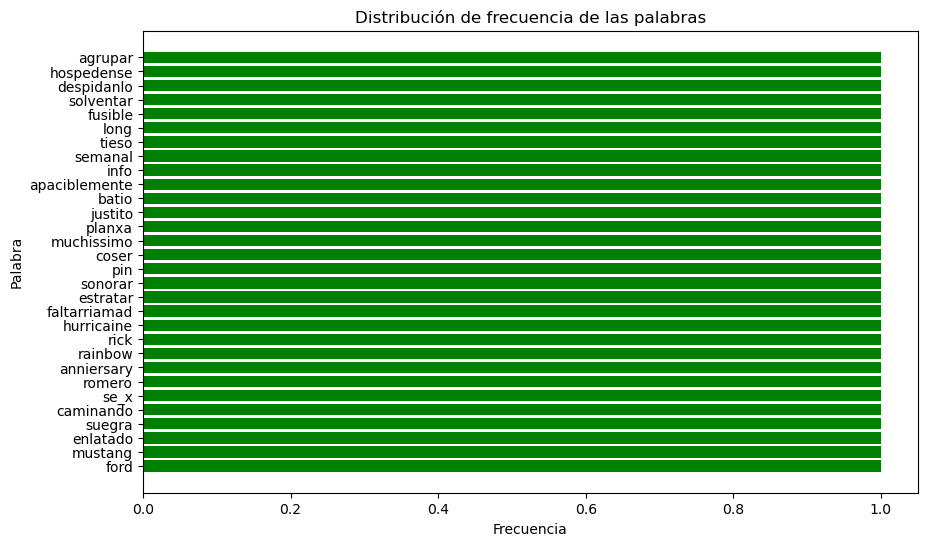

In [230]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

#### 3.2 Columna target y texto

In [231]:
x_train_completo, y_train_completo = x_train_completo['tokens'],x_train_completo['Class']
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test_completo['tokens'],x_test_completo['Class']

In [232]:
x_train_completo

4425    encanto par desayunar domingo familia agradabl...
5261    alojar unidad b semana edificio planta bonito ...
1960    realmente restaurante sorprender entrar varios...
2027    viejo instalación deteriorado requerir manteni...
6658    tarde alojar ano encanto regreso lamentablemen...
                              ...                        
905     alojar noche alli pared fino escuchar cada mov...
5192    level impecable amplio magnifico visto servici...
3980    parecer fiesta inn finsa mantenimiento decar s...
235     visitar encanto calidad servicio comodo excele...
5157    impresionante solo comprar tiempo show luz pm ...
Name: tokens, Length: 4291, dtype: object

## 4. Embedding del texto
Transformación del texto en formato para la máquina

#### 4.1 Count Vectorizer
Utilización del conteo de palabras presentes como Vectorizer -> No creo que sea tan bueno

In [233]:
count = CountVectorizer()
x_train_complete_countVectorizer = count.fit_transform(x_train_completo)
print(x_train_complete_countVectorizer.shape)
x_train_complete_countVectorizer.toarray()[3]

x_train_countVectorizer = count.transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]


x_val_countVectorizer = count.transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]


x_test_countVectorizer = count.transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(4291, 11418)
(1600, 11418)
(1073, 11418)
(3511, 11418)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 4.2 TfiDf

In [234]:
tfidf = TfidfVectorizer(min_df=0.1)
x_train_completo_tfidfVectorizer = tfidf.fit_transform(x_train_completo)
print(x_train_completo_tfidfVectorizer.shape)
x_train_completo_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_completo_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))



x_train_tfidfVectorizer = tfidf.transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_test_tfidfVectorizer = tfidf.transform(x_test)
print(x_test_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
#print(df_test.head(20))

x_val_tfidfVectorizer = tfidf.transform(x_val)
print(x_val_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

#print(x_val_tfidfVectorizer[0].T)

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
#print(df_val.head(20))




ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

### 5. Construcción de los modelos

#### 5.1 Naive bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training
model.fit(pd.DataFrame.sparse.from_spmatrix(x_train_completo_tfidfVectorizer), y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(pd.DataFrame.sparse.from_spmatrix(x_test_tfidfVectorizer))

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [4 5 5 ... 5 4 5]


In [ ]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.42
Recall: 0.3140791619529849
Precisión: 0.461059477766067
Puntuación F1: 0.28065249814278026


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train_complete_countVectorizer.toarray(), y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer.toarray())

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [2 3 2 ... 3 4 4]


In [ ]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.27
Recall: 0.28061670264103333
Precisión: 0.2840976725938909
Puntuación F1: 0.26341935734009714


#### 5.2 Support vector machines - Ana Sofía Castellanos


Inicialmente se implementa el algoritmo con algunos hiperparámetros aleatorios, para tener una idea preliminar del rendimiento

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from time import time
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel='linear')
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Training time: 1.133696s; Prediction time: 1.614053s
Class 1:  {'precision': 0.3973634651600753, 'recall': 0.6298507462686567, 'f1-score': 0.4872979214780601, 'support': 335.0}
Class 2:  {'precision': 0.29442508710801396, 'recall': 0.31647940074906367, 'f1-score': 0.30505415162454874, 'support': 534.0}
Class 3:  {'precision': 0.3179650238473768, 'recall': 0.2949852507374631, 'f1-score': 0.30604437643458304, 'support': 678.0}
Class 4:  {'precision': 0.39815880322209435, 'recall': 0.3900789177001127, 'f1-score': 0.39407744874715256, 'support': 887.0}
Class 5:  {'precision': 0.6365638766519823, 'recall': 0.5366759517177344, 'f1-score': 0.582367758186398, 'support': 1077.0}


[[211  80  20  17   7]
 [169 169 124  50  22]
 [ 91 192 200 141  54]
 [ 36  83 175 346 247]
 [ 24  50 110 315 578]]


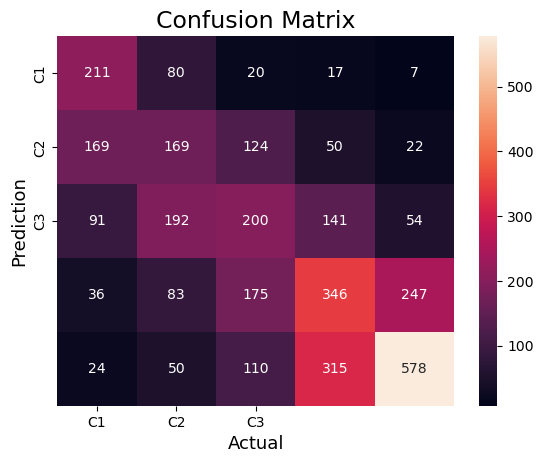

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test,prediction_linear)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['C1', 'C2', 'C3'],
            yticklabels=['C1', 'C2', 'C3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print('Exactitud: %.2f' % accuracy_score(y_test, prediction_linear))
print("Recall: {}".format(recall_score(y_test,prediction_linear, average="macro")))
print("Precisión: {}".format(precision_score(y_test,prediction_linear, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,prediction_linear, average="macro")))

Exactitud: 0.43
Recall: 0.43361405343460613
Precisión: 0.4088952511979086
Puntuación F1: 0.41496833129414845


##### 5.2.1 Búsqueda de hiperparámetros


In [ ]:
#Espacio de busqueda
param_grid = {'C': [0.1,1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  

##### Dummy grid search
A partir del conjunto de datos de validación se buscan los hipérparametros. Los resultados de esta búsqueda no son para nada buenos ya que se obtienen conmo mejores parametros: [c = 1, g = 1, kernel = 'poly'] y como se observa esto lleva a tener clase 1 y 2 sin precision, ya que no los clasifica. Se comenta el código ya que demora unos 30min en ejecutar


In [ ]:
"""best_score= -1000
best_parameters = []
i = 0
for c in param_grid['C']: 
    for g in param_grid['gamma']:
        for k in param_grid['kernel']:
            param = [c,g,k]
            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)
            classifier = SVC(C=c, gamma=g, kernel=k)
            classifier.fit(x_val_tfidfVectorizer, y_val)
            score = classifier.score(x_val_tfidfVectorizer, y_val)
            if score> best_score: 
                best_score = score
                best_parameters = [c,g,k]
            print(1/64*i*100, '%'  )
            i+=1



print(best_score,best_parameters)"""

"best_score= -1000\nbest_parameters = []\ni = 0\nfor c in param_grid['C']: \n    for g in param_grid['gamma']:\n        for k in param_grid['kernel']:\n            param = [c,g,k]\n            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)\n            classifier = SVC(C=c, gamma=g, kernel=k)\n            classifier.fit(x_val_tfidfVectorizer, y_val)\n            score = classifier.score(x_val_tfidfVectorizer, y_val)\n            if score> best_score: \n                best_score = score\n                best_parameters = [c,g,k]\n            print(1/64*i*100, '%'  )\n            i+=1\n\n\n\nprint(best_score,best_parameters)"

In [ ]:
best_parameters = 1,1,'poly'
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel=best_parameters[2],C=best_parameters[0],gamma=best_parameters[1])
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Training time: 1.090206s; Prediction time: 1.454015s
Class 1:  {'precision': 0.35, 'recall': 0.5432835820895522, 'f1-score': 0.42573099415204674, 'support': 335.0}
Class 2:  {'precision': 0.2677165354330709, 'recall': 0.31835205992509363, 'f1-score': 0.290846877673225, 'support': 534.0}
Class 3:  {'precision': 0.26813471502590674, 'recall': 0.3053097345132743, 'f1-score': 0.28551724137931034, 'support': 678.0}
Class 4:  {'precision': 0.37589498806682575, 'recall': 0.3551296505073281, 'f1-score': 0.36521739130434777, 'support': 887.0}
Class 5:  {'precision': 0.6394101876675603, 'recall': 0.4428969359331476, 'f1-score': 0.5233132199670871, 'support': 1077.0}


##### K-fold grid search
Dado que el dummy search da pésimos resultados se opta por hacer un k-fold para encontrar los hiperparámetros óptimos. De aquí se encuentra que el mejor parámetro tiene los hiperparámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}. Se deja comentado ya que demora 1h aproximadamente. 


In [ ]:
from sklearn.model_selection import KFold 
particiones = KFold(n_splits=3,shuffle=True,random_state=0)

In [ ]:
svm = SVC()
best_model = GridSearchCV(svm, param_grid, cv=particiones,verbose = 3)

In [ ]:
"""# Ajuste del modelo
best_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)
#El grid search se demora 23 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros"""

'# Ajuste del modelo\nbest_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)\n#El grid search se demora 23 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros'

In [ ]:
"""best_model.best_params_ """

'best_model.best_params_ '

In [ ]:
"""svm_final = best_model.best_estimator_"""

'svm_final = best_model.best_estimator_'

In [ ]:

svm_final = SVC(C=10,gamma=1,kernel='rbf')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo =  svm_final.predict(x_test_tfidfVectorizer)

report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Class 1:  {'precision': 0.5508021390374331, 'recall': 0.3074626865671642, 'f1-score': 0.3946360153256705, 'support': 335.0}
Class 2:  {'precision': 0.38377192982456143, 'recall': 0.32771535580524347, 'f1-score': 0.3535353535353536, 'support': 534.0}
Class 3:  {'precision': 0.3657587548638132, 'recall': 0.415929203539823, 'f1-score': 0.3892339544513457, 'support': 678.0}
Class 4:  {'precision': 0.40903823870220163, 'recall': 0.3979706877113867, 'f1-score': 0.4034285714285714, 'support': 887.0}
Class 5:  {'precision': 0.5948136142625607, 'recall': 0.6815227483751161, 'f1-score': 0.6352228472522717, 'support': 1077.0}


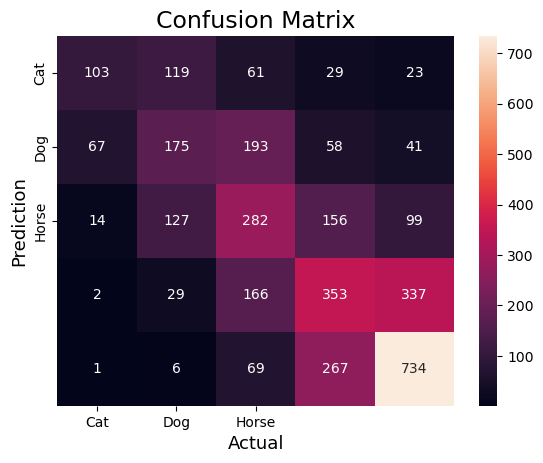

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cat', 'Dog', 'Horse'],
            yticklabels=['Cat', 'Dog', 'Horse'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.47
Recall: 0.42612013639974666
Precisión: 0.460836935338114
Puntuación F1: 0.4352113483986426


#### 5.3 Arbol de decisión - Maria Camila Luna Velasco

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
particiones = KFold(n_splits=10, shuffle=True, random_state = 0) 

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 6, 8, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}


In [ ]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

##### Resultados Count Vectorizer

In [ ]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
modelo_count = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
modelo_count.fit(x_train_countVectorizer, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
modelo_count.best_params_



{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
arbol_count = modelo_count.best_estimator_

In [ ]:
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_count.predict(x_train_countVectorizer)
y_pred_test = arbol_count.predict(x_test_countVectorizer)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.66
Exactitud sobre test: 0.33


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.30      0.38      0.34       335
           2       0.25      0.23      0.24       534
           3       0.24      0.18      0.20       678
           4       0.31      0.58      0.41       887
           5       0.62      0.27      0.37      1077

    accuracy                           0.33      3511
   macro avg       0.35      0.33      0.31      3511
weighted avg       0.38      0.33      0.33      3511



In [ ]:
# Predecir las etiquetas en el conjunto de validación con CountVectorizer
predicciones_count = modelo_count.predict(x_val_countVectorizer)

# Calcular las métricas con CountVectorizer
exactitud_count = accuracy_score(y_val, predicciones_count)
recall_count = recall_score(y_val, predicciones_count, average='weighted')
precision_count = precision_score(y_val, predicciones_count, average='weighted')
f1_count = f1_score(y_val, predicciones_count, average='weighted')

# Imprimir las métricas con CountVectorizer
print("\nExactitud con CountVectorizer:", exactitud_count)
print("Recall con CountVectorizer:", recall_count)
print("Precision con CountVectorizer:", precision_count)
print("Puntaje F1 con CountVectorizer:", f1_count)



Exactitud con CountVectorizer: 0.35787511649580617
Recall con CountVectorizer: 0.35787511649580617
Precision con CountVectorizer: 0.4058621433811404
Puntaje F1 con CountVectorizer: 0.3470879816656594


#### Resultados tfid Vectorizer

In [ ]:
modelo_tfidf = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
modelo_tfidf.fit(x_train_tfidfVectorizer, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
modelo_tfidf.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
arbol_tfidf = modelo_tfidf.best_estimator_

In [ ]:

# Probemos ahora este modelo sobre test.
y_pred_train = arbol_tfidf.predict(x_train_tfidfVectorizer)
y_pred_test = arbol_tfidf.predict(x_test_tfidfVectorizer)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.63
Exactitud sobre test: 0.34


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.25      0.40      0.31       335
           2       0.34      0.20      0.25       534
           3       0.26      0.20      0.23       678
           4       0.31      0.59      0.41       887
           5       0.60      0.27      0.37      1077

    accuracy                           0.34      3511
   macro avg       0.35      0.33      0.31      3511
weighted avg       0.39      0.34      0.33      3511



In [ ]:
# Obtener los nombres de las características utilizadas en el vectorizador TF-IDF
nombres_caracteristicas = tfidf.get_feature_names_out()

# Obtener las importancias de las características del modelo de árbol de decisión
importancia_atributos = modelo_tfidf.best_estimator_.feature_importances_

# Crear un DataFrame de importancias de características
df_importancias = pd.DataFrame({'Palabra': nombres_caracteristicas, 'Importancia': importancia_atributos})

# Ordenar el DataFrame por importancia en orden descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Mostrar las primeras 10 filas
print(df_importancias.head(10))



         Palabra  Importancia
4472   excelente     0.068839
10207      sucio     0.049307
6698         mal     0.046872
8240      pesimo     0.034260
6653          ma     0.032754
6723        malo     0.031332
1378        bien     0.026550
2262      ciudad     0.024233
3288    desayuno     0.021639
8136        peor     0.017505


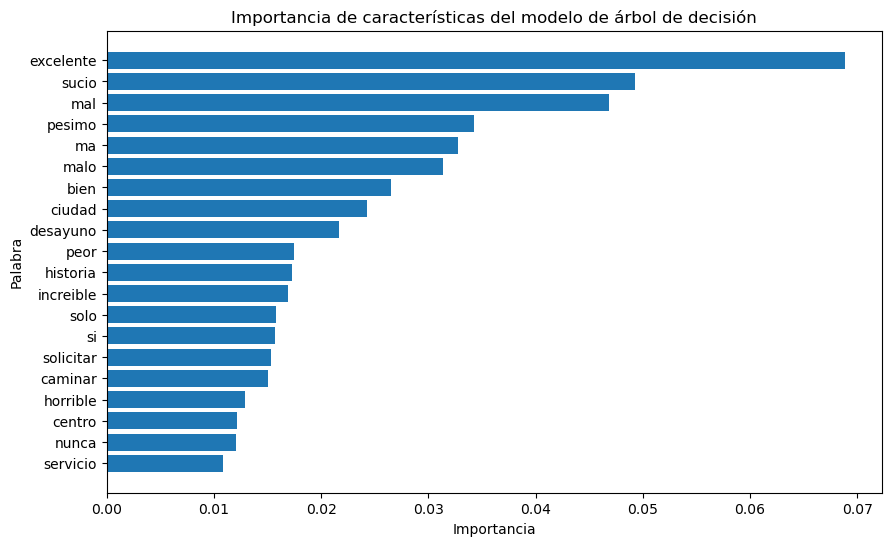

In [ ]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontal
plt.barh(df_importancias['Palabra'][:20], df_importancias['Importancia'][:20])

# Invertir el eje y para que las características más importantes estén en la parte superior
plt.gca().invert_yaxis()

# Agregar título y etiquetas de los ejes
plt.title('Importancia de características del modelo de árbol de decisión')
plt.xlabel('Importancia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.show()


In [ ]:
predicciones= modelo_tfidf.predict(x_val_tfidfVectorizer)

In [ ]:
# Calcular las métricas
exactitud = accuracy_score(y_val, predicciones)
recall = recall_score(y_val, predicciones, average='weighted')
precision = precision_score(y_val, predicciones, average='weighted')
f1 = f1_score(y_val, predicciones, average='weighted')

# Imprimir las métricas
print("Exactitud:", exactitud)
print("Recall:", recall)
print("Precision:", precision)
print("Puntaje F1:", f1)


Exactitud: 0.32246039142590865
Recall: 0.32246039142590865
Precision: 0.36307590815864155
Puntaje F1: 0.30544846633816924


#### 5.4 Regresión Logística - Juan Manuel Jauregui

In [ ]:
from sklearn.linear_model import LogisticRegression

# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression()

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

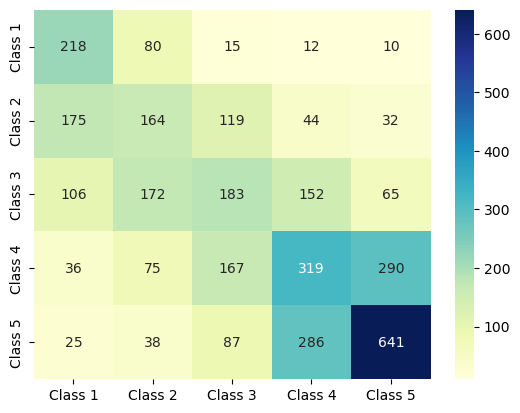

In [ ]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.39      0.65      0.49       335
           2       0.31      0.31      0.31       534
           3       0.32      0.27      0.29       678
           4       0.39      0.36      0.38       887
           5       0.62      0.60      0.61      1077

    accuracy                           0.43      3511
   macro avg       0.41      0.44      0.41      3511
weighted avg       0.43      0.43      0.43      3511



In [ ]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.43
Recall: 0.4365169769532152
Precisión: 0.40594052561645083
Puntuación F1: 0.41403732652205083


##### 5.2.1 Búsqueda de hiperparámetros


Se aplican métodos similares a los propuestos en el de SVM para hallar los mejores hiperparámetros

##### Dummy search

In [ ]:
# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression(C=10, solver="lbfgs")

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

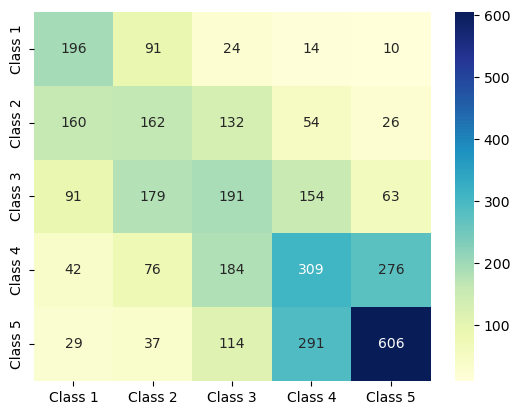

In [ ]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.38      0.59      0.46       335
           2       0.30      0.30      0.30       534
           3       0.30      0.28      0.29       678
           4       0.38      0.35      0.36       887
           5       0.62      0.56      0.59      1077

    accuracy                           0.42      3511
   macro avg       0.39      0.42      0.40      3511
weighted avg       0.42      0.42      0.42      3511



In [ ]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.42
Recall: 0.41623913975125487
Precisión: 0.3930799055250754
Puntuación F1: 0.39982130566555807


#### K-fold cross validation

In [ ]:
# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression(C=1, solver="lbfgs")

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

In [ ]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

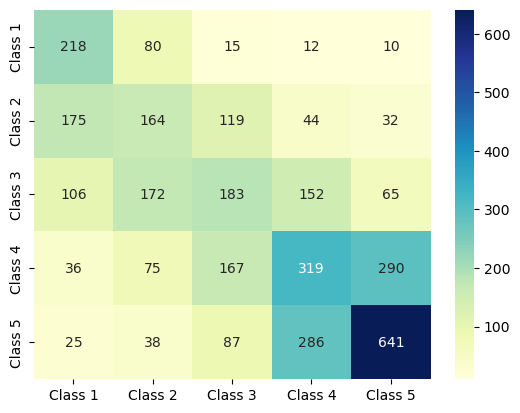

In [ ]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.39      0.65      0.49       335
           2       0.31      0.31      0.31       534
           3       0.32      0.27      0.29       678
           4       0.39      0.36      0.38       887
           5       0.62      0.60      0.61      1077

    accuracy                           0.43      3511
   macro avg       0.41      0.44      0.41      3511
weighted avg       0.43      0.43      0.43      3511



In [ ]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.43
Recall: 0.4365169769532152
Precisión: 0.40594052561645083
Puntuación F1: 0.41403732652205083


### 6. Mejor modelo

In [ ]:
svm_final = SVC(C=10,gamma=1,kernel='rbf')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo =  svm_final.predict(x_test_tfidfVectorizer)
print(y_pred_test_completo)




[4 5 5 ... 5 4 5]


In [ ]:
x_test_completo['ClassBestModel'] =y_pred_test_completo
x_test

1953    hermoso arreglar malecon caminar tranquilament...
4576    hermoso legado epoca colonial pintoresco hermo...
2217    visitar costo disfrutar hermoso ciudad foto sa...
5386    alto camino empinado lindo iglesia espectacula...
4141    bonito terraza agradable mitad paseo montejo p...
                              ...                        
1903    opcion visitar calidez bonito duda volver visitar
3780    varios vez trave excursión autobus caminar lar...
3867    bien diagramado explicación material historia ...
7509    increiblemente conservar ceremosnia canonazo p...
1524    excelente servicio entretenimiento esposo enca...
Name: tokens, Length: 3511, dtype: object

In [ ]:
report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Class 1:  {'precision': 0.5508021390374331, 'recall': 0.3074626865671642, 'f1-score': 0.3946360153256705, 'support': 335.0}
Class 2:  {'precision': 0.38377192982456143, 'recall': 0.32771535580524347, 'f1-score': 0.3535353535353536, 'support': 534.0}
Class 3:  {'precision': 0.3657587548638132, 'recall': 0.415929203539823, 'f1-score': 0.3892339544513457, 'support': 678.0}
Class 4:  {'precision': 0.40903823870220163, 'recall': 0.3979706877113867, 'f1-score': 0.4034285714285714, 'support': 887.0}
Class 5:  {'precision': 0.5948136142625607, 'recall': 0.6815227483751161, 'f1-score': 0.6352228472522717, 'support': 1077.0}


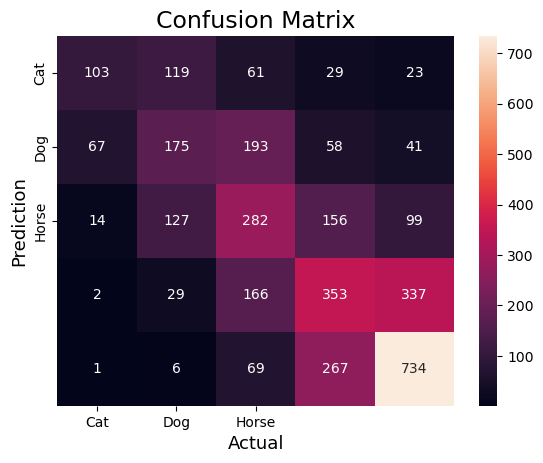

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cat', 'Dog', 'Horse'],
            yticklabels=['Cat', 'Dog', 'Horse'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:

print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.47
Recall: 0.42612013639974666
Precisión: 0.460836935338114
Puntuación F1: 0.4352113483986426


In [ ]:
"""from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_final, pd.DataFrame.sparse.from_spmatrix(x_test_tfidfVectorizer), y_test)

feature_names = tfidf.get_feature_names_out()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")"""

'from sklearn.inspection import permutation_importance\n\nperm_importance = permutation_importance(svm_final, pd.DataFrame.sparse.from_spmatrix(x_test_tfidfVectorizer), y_test)\n\nfeature_names = tfidf.get_feature_names_out()\nfeatures = np.array(feature_names)\n\nsorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Permutation Importance")'

#### 6.1 Obtención de caracteristicas relevantes en conjunto train  en la partición  x_test

In [ ]:
x_test_completo

Unnamed: 0                                             Review  Class  \
1953        1959  muy hermoso como han arreglado el malecon, se ...      4   
4576        4607  Hermoso legado de la época colonial. Muy pinto...      5   
2217        2226  Visitamos el lugar de dia por un costo de  cuc...      4   
5386        5431  Muy alto y caminos empinados pero muy linda ig...      4   
4141        4167  Un lugar muy bonito,con una terraza muy agrada...      4   
...          ...                                                ...    ...   
1903        1908  Una buena opción a visitar, calidez y muy boni...      4   
3780        3802  Hemos ido varias veces a través de estas excur...      3   
3867        3890  Está muy bien diagramado, con muy buenas expli...      4   
7509        7582  Es un lugar increiblemente conservado. La cere...      5   
1524        1526  Excelente servicio y entretenimiento con mi es...      5   

      len  Max  Min                                             tokens  \
1953  132   14    1  hermoso arreglar malecon caminar tranquilament...   
4576  170   12    1  hermoso legado epoca colonial pintoresco hermo...   
2217  236   25    1  visitar costo disfrutar hermoso ciudad foto sa...   
5386  100   13    1  alto camino empinado lindo iglesia espectacula...   
4141  266   14    1  bonito terraza agradable mitad paseo montejo p...   
...   ...  ...  ...                                                ...   
1903  100    8    1  opcion visitar calidez bonito duda volver visitar   
3780  501   11    1  varios vez trave excursión autobus caminar lar...   
3867  178   13    1  bien diagramado explicación material historia ...   
7509  288   14    1  increiblemente conservar ceremosnia canonazo p...   
1524  230   15    1  excelente servicio entretenimiento esposo enca...   

      ClassBestModel  
1953               4  
4576               5  
2217               5  
5386               5  
4141               4  
...              ...  
1903               5  
3780               4  
3867               5  
7509               4  
1524               5  

[3511 rows x 8 columns]

In [ ]:
x_test_completo['moda'] = [moda(i) for i in x_test_completo['tokens']]
x_test_completo.to_csv('resultadoFinalTest.csv')

In [ ]:
class1_test = x_test_completo.loc[x_test_completo['ClassBestModel']==1]
class2_test = x_test_completo.loc[x_test_completo['ClassBestModel']==2]
class3_test = x_test_completo.loc[x_test_completo['ClassBestModel']==3]
class4_test = x_test_completo.loc[x_test_completo['ClassBestModel']==4]
class5_test = x_test_completo.loc[x_test_completo['ClassBestModel']==5]

In [ ]:
#Max tiene el máximo tamaño de la palabra
class1_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class1_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
class1_test['len'] = [len(i)  for i in class1_test['tokens']]
class1_test['moda'] = [moda(i) for i in class1_test['tokens']]


class2_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class2_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class2_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class2_test['tokens']]
class2_test['len'] = [len(i)  for i in class2_test['tokens']]
class2_test['moda'] = [moda(i) for i in class2_test['tokens']]


class3_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class3_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class3_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class3_test['tokens']]
class3_test['len'] = [len(i)  for i in class3_test['tokens']]
class3_test['moda'] = [moda(i) for i in class3_test['tokens']]

class4_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class4_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class4_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class4_test['tokens']]
class4_test['len'] = [len(i)  for i in class4_test['tokens']]
class4_test['moda'] = [moda(i) for i in class4_test['tokens']]

class5_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class5_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class5_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class5_test['tokens']]
class5_test['len'] = [len(i)  for i in class5_test['tokens']]
class5_test['moda'] = [moda(i) for i in class5_test['tokens']]




C:\Users\ascas\AppData\Local\Temp\ipykernel_41016\3738526227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
C:\Users\ascas\AppData\Local\Temp\ipykernel_41016\3738526227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
C:\Users\ascas\AppData\Local\Temp\ipykernel_41016\3738526227.py:5: SettingWithCopyWarning: 
A va

In [ ]:
def getFrecuenciesGroup(textos,size): 
    dictFrec = frecuenciaPalabras(textos['tokens'])

    df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

    df_Frecuencias['palabra'] = df_Frecuencias.index
    df_Frecuencias.reset_index(drop=True,inplace=True)
    print(df_Frecuencias)

    #df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]
    #print(df_Frecuencias)

    return df_Frecuencias

In [ ]:
size = 20
dfFrecuencias1 = getFrecuenciesGroup(class1_test,size)
sortedFirst1, sortedLast1 = dfFrecuencias1.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias1.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)
print(sortedFirst1)
dfFrecuencias2 = getFrecuenciesGroup(class2_test,size)
sortedFirst2, sortedLast2 = dfFrecuencias2.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias2.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias3= getFrecuenciesGroup(class3_test,size)
sortedFirst3, sortedLast3 = dfFrecuencias3.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias3.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias4 = getFrecuenciesGroup(class4_test,size)
sortedFirst4, sortedLast4 = dfFrecuencias4.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias4.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias5 = getFrecuenciesGroup(class5_test,size)
sortedFirst5, sortedLast5 = dfFrecuencias5.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias5.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

#print(sortedFirst1.sort_values(by=['frecuencia'], ascending=False))

{'horrible': 23, 'estadia': 5, 'atencion': 21, 'persona': 33, 'limpieza': 15, 'tocar': 6, 'cucaracha': 11, 'nido': 1, 'cama': 16, 'asco': 4, 'nunca': 50, 'pasar': 33, 'limpiar': 9, 'tampoco': 7, 'suerte': 2, 'quedar': 26, 'jama': 12, 'volver': 29, 'rico': 4, 'general': 13, 'servicio': 92, 'malo': 52, 'ofrecer': 19, 'promoción': 1, 'final': 3, 'respetar': 8, 'cobrar': 25, 'entrar': 13, 'tomar': 17, 'canelazo': 6, 'salir': 13, 'dirijir': 1, 'caja': 6, 'pagar': 36, 'supuesto': 5, 'entregar': 6, 'cuenta': 13, 'exuberante': 1, 'cover': 9, 'ooo': 1, 'peso': 8, 'cada': 13, 'ma': 39, 'pesimo': 53, 'visitar': 6, 'primero': 26, 'mil': 1, 'ano': 23, 'carta': 11, 'casi': 12, 'levantar': 4, 'despues': 35, 'minuto': 25, 'llevar': 24, 'pedido': 3, 'simple': 1, 'botella': 9, 'agua': 36, 'tomado': 1, 'mo': 2, 'trato': 7, 'empleado': 12, 'hall': 3, 'inclusive': 2, 'nino': 9, 'menor': 3, 'considerar': 3, 'adulto': 3, 'plaza': 3, 'solo': 53, 'usar': 4, 'segun': 5, 'veaser': 1, 'despegar': 2, 'booking': 1,

##### 6.1.1 Palabras relevantes por clase 

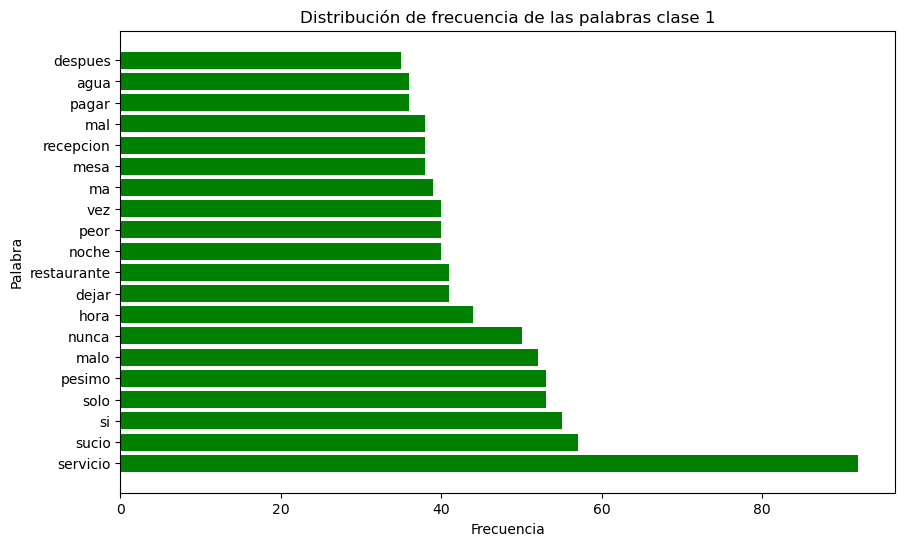

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst1['palabra'], sortedFirst1['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras clase 1')
plt.show()

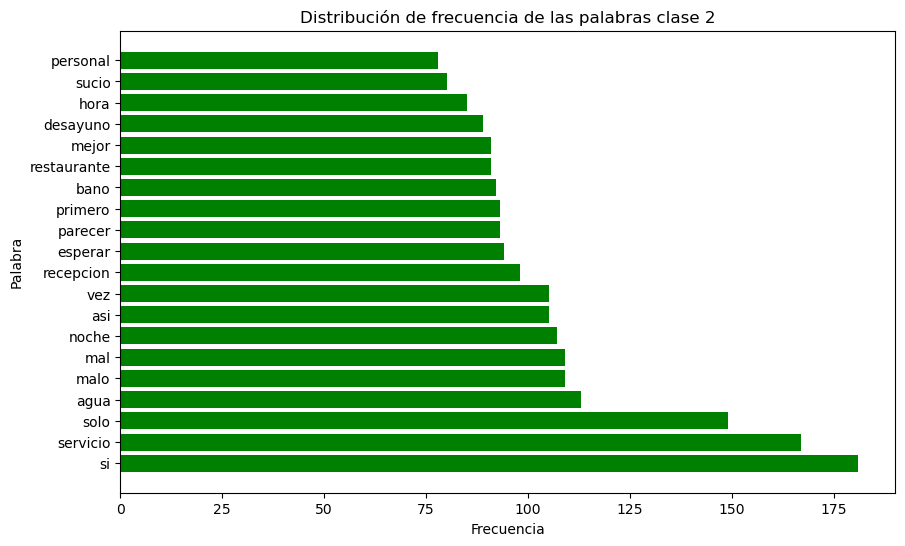

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst2['palabra'], sortedFirst2['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras clase 2')
plt.show()




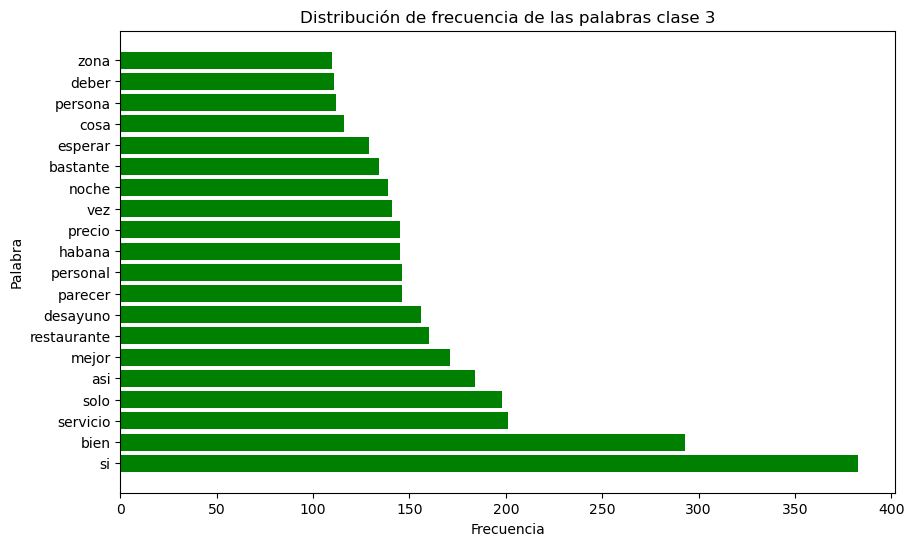

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst3['palabra'], sortedFirst3['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras clase 3')
plt.show()

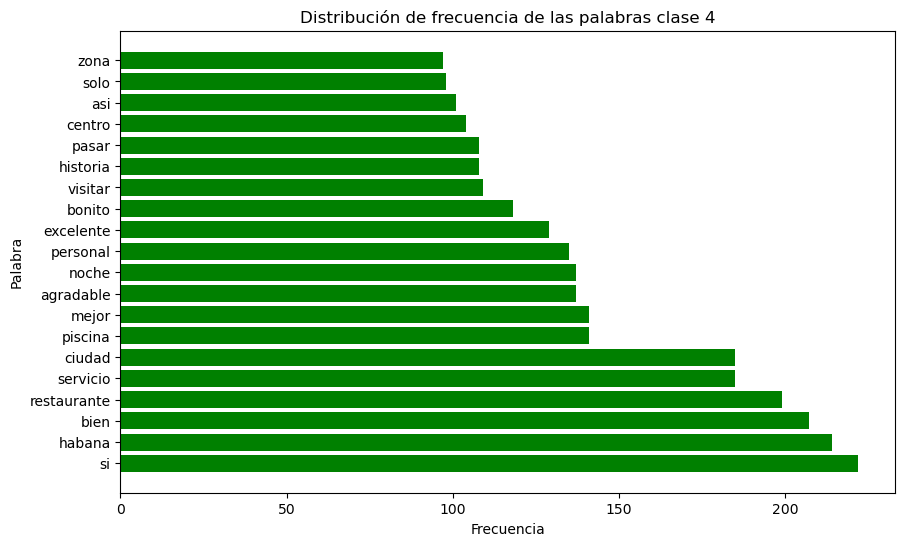

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst4['palabra'], sortedFirst4['frecuencia'], color='green')



plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras clase 4')
plt.show()

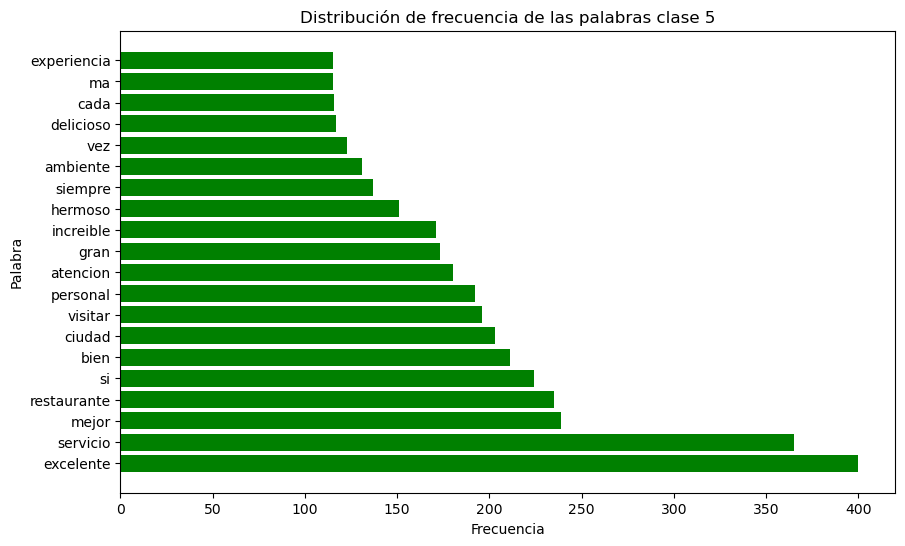

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst5['palabra'], sortedFirst5['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras clase 5')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def getCompleteText(textos): 
    string = ""

    for e in textos['palabra']: 
        string+=e+ " "
    return string

texto1 = ' '.join(dfFrecuencias1['palabra'])
texto2 = ' '.join(dfFrecuencias2['palabra'])
texto3 = ' '.join(dfFrecuencias3['palabra'])
texto4 = ' '.join(dfFrecuencias4['palabra'])
texto5 = ' '.join(dfFrecuencias5['palabra'])
print(texto1)



horrible estadia atencion persona limpieza tocar cucaracha nido cama asco nunca pasar limpiar tampoco suerte quedar jama volver rico general servicio malo ofrecer promoción final respetar cobrar entrar tomar canelazo salir dirijir caja pagar supuesto entregar cuenta exuberante cover ooo peso cada ma pesimo visitar primero mil ano carta casi levantar despues minuto llevar pedido simple botella agua tomado mo trato empleado hall inclusive nino menor considerar adulto plaza solo usar segun veaser despegar booking trivago cuidado consejo claro momento reserva recomendar sucio caducado mal peor cadena motivo bajar calidad sumo importancia asunto solucionar problema dejar perder cliente ocasion reciente aire acondicionado funcionar olor cubrelecho roto mueble adecuado trabajar fuerte danado piso bano lamentable com gana comer quitar atender camarero pesadisimo parar intentar gracioso llamar car carlito si preferir animal empezar caliente cierto hora fria simplemente fatal muerto ahi toalla v

##### 6.1.2 Nube de palabras por clase

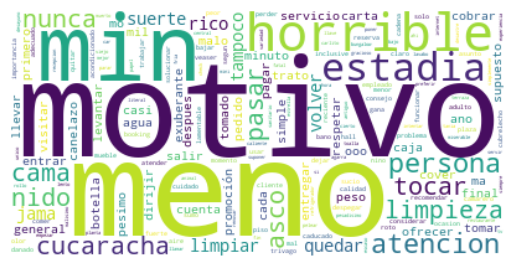

In [ ]:
wc = WordCloud(background_color = "white")
wc.generate(texto1)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


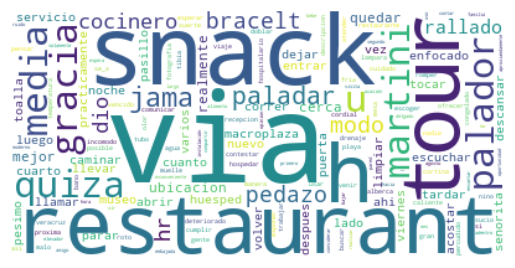

In [ ]:
wc = WordCloud(background_color = "white")
wc.generate(texto2)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


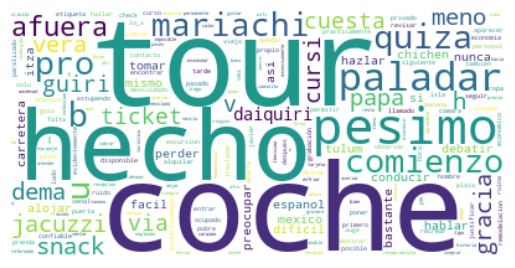

In [ ]:
wc = WordCloud(background_color = "white")
wc.generate(texto3)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


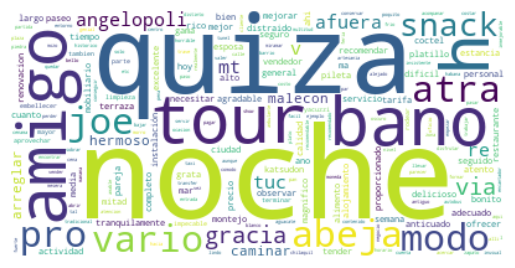

In [ ]:
wc = WordCloud(background_color = "white")
wc.generate(texto4)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


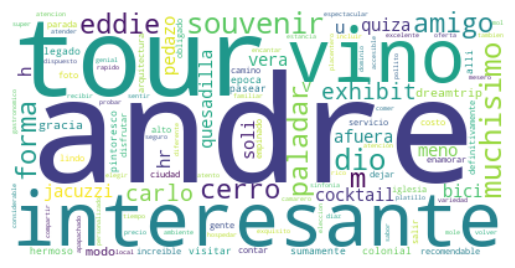

In [ ]:
wc = WordCloud( background_color = "white")
wc.generate(texto5)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


#### 6.2 Predicción de datos futuros

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data_test=pd.read_csv('particion_prueba_estudiantes.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos

In [ ]:
data_test

Review
0     La primera noche nos encontramos en la habitac...
1     A una calle de catedral con platillos tradicio...
2     Porciones muy miserables\nAgua con sabor a clo...
3     Cartagena encanta. De todas las ciudades colon...
4     Ibamos con mucha ilusion de disfrutar el espec...
...                                                 ...
1745  Subir en funicular y bajar en teleferico fue u...
1746  La gente espera el lugar central en La Habana,...
1747  Todo excelente con el hotel: las albercas para...
1748  Nos detuvimos en un bocado antes de la puesta ...
1749  NO TENIA AGUA, el mantenimiento un desastre ( ...

[1750 rows x 1 columns]

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1750 non-null   object
dtypes: object(1)
memory usage: 13.8+ KB


In [ ]:
textos_test = data_test.copy()


###### 6.2.1 Preprocesamiento de datos test

###### 6.2.1.1 Duplicados

In [ ]:

textos_test.duplicated(keep = False).sum()

10

In [ ]:
textos_test.drop_duplicates(keep='first', inplace=True)
textos_test.duplicated(keep = False).sum()

0

###### 6.2.1.2 Eliminación de Números

In [ ]:
#Quitar los números

textos_test['Review'] = textos_test['Review'].replace(r'\d+,\d+', '', regex=True)
textos_test['Review'] = textos_test['Review'].replace(r'\d+', '', regex=True)
textos_test['Review'] = textos_test['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos_test['Review'][0])

La primera noche nos encontramos en la habitación con un nido () de cucarachas muertas y la alfombra muy sucia...que por cierto nunca limpiaron hasta que reclamamos.  La cena de fin de año fue un bufete que acabó en un tremendo desorden por el excesivo número de mesas vendidas, no se podía caminar para ir a servirte la comida, para luego encontrarte con bandejas vacías,  mi esposa y yo y otra pareja "NO CENAMOS" porque nos encontramos con puras bandejas vacías!!...pagamos $ pesos por por pareja por nada!!!  El servicio del restaurante pesimo, pesimo,pesimo....se tardaron muchísimo tiempo en atendernos, nos trajeron el desayuno en partes, nunca nos dieron el café que pedimos desde que llegamos....un pésimo servicio  El frigobar vacío y después de reclamar lo surtieron pero_x_


##### 6.2.1.3 Soft processing

In [ ]:
textos_test['tokens'] = [i.split(' ') for i in textos_test['Review']]
textos_test['tokens'] = textos_test['tokens'].apply(softPreprocessing)#Se aplica un preprocesamiento muy tranqui

textos_test.iloc[1201]['tokens']

'este hotel fue en su momento un icono en la habana pero ahora mismo necesita bastantes reformas. en primer lugar solo funcionaba un ascensor por lo que bajar y subir era una odisea. varias puertas de acceso al hotel no abren, asi como el echo de que en recepcion no hay aire acondicionado. las habitaciones sencillas, pero la moqueta necesita cambiarse al igual que las ventanas. como opinion positiva el personal, tanto de recepcion como los porteros y la ubicacion frente al malecon.espero que ahora que lo ha cogido la cadena iberostar le devuelva el explendor que tuvo hace anos. '

##### 6.2.1.4 Lemmatizer

In [ ]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos_test['tokens']= textos_test.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos_test.to_csv('lemaSoftProcessing_test.csv')
"""

"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos_test['tokens']= textos_test.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos_test.to_csv('lemaSoftProcessing_test.csv')\n"

In [ ]:

from ast import literal_eval
textosLemas_test = pd.read_csv('lemaSoftProcessing_test.csv', sep=',', encoding = 'utf-8')
textosLemas_test.iloc[1201]
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(literal_eval)
#print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(getString)
print(textosLemas_test['tokens'])

0       el primero noche yo encontrar en el habitacion...
1       a uno calle de catedral con platillo tradicion...
2       porción mucho miserable agua con sabor a cloro...
3       cartagena encantar . de todo el ciudad colonia...
4       ir con mucho ilusion de disfrutar el espectacu...
                              ...                        
1740    subir en funicular y bajar en teleferico ser u...
1741    el gente esperar el lugar central en el habana...
1742    todo excelente con el hotel : el alberca para ...
1743    yo detener en uno bocado antes de el puesta de...
1744    no tener agua , el mantenimiento uno desastre ...
Name: tokens, Length: 1745, dtype: object


In [ ]:

textosLemas_test['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas_test['tokens']]
    
textosLemas_test['tokens'].iloc[1201]

['este',
 'hotel',
 'ser',
 'en',
 'su',
 'momento',
 'uno',
 'icono',
 'en',
 'el',
 'habana',
 'pero',
 'ahora',
 'mismo',
 'necesitar',
 'bastante',
 'reforma',
 '.',
 'en',
 'primero',
 'lugar',
 'solo',
 'funcionar',
 'uno',
 'ascensor',
 'por',
 'él',
 'que',
 'bajar',
 'y',
 'subir',
 'ser',
 'uno',
 'odisea',
 '.',
 'varios',
 'puerta',
 'de',
 'acceso',
 'a',
 'el',
 'hotel',
 'no',
 'abrir',
 ',',
 'asi',
 'como',
 'el',
 'echo',
 'de',
 'que',
 'en',
 'recepcion',
 'no',
 'haber',
 'aire',
 'acondicionado',
 '.',
 'el',
 'habitación',
 'sencillo',
 ',',
 'pero',
 'el',
 'moqueta',
 'necesitar',
 'cambiar',
 'él',
 'a',
 'el',
 'igual',
 'que',
 'el',
 'ventana',
 '.',
 'como',
 'opinion',
 'positivo',
 'el',
 'personal',
 ',',
 'tanto',
 'de',
 'recepcion',
 'como',
 'el',
 'portero',
 'y',
 'el',
 'ubicacion',
 'frente',
 'a',
 'el',
 'malecon',
 '.',
 'esperar',
 'que',
 'ahora',
 'que',
 'él',
 'haber',
 'coger',
 'el',
 'cadena',
 'iberostar',
 'él',
 'devolver',
 'el',


In [ ]:
textosLemas_test['tokens'].dropna()

0       [el, primero, noche, yo, encontrar, en, el, ha...
1       [a, uno, calle, de, catedral, con, platillo, t...
2       [porción, mucho, miserable, agua, con, sabor, ...
3       [cartagena, encantar, ., de, todo, el, ciudad,...
4       [ir, con, mucho, ilusion, de, disfrutar, el, e...
                              ...                        
1740    [subir, en, funicular, y, bajar, en, teleferic...
1741    [el, gente, esperar, el, lugar, central, en, e...
1742    [todo, excelente, con, el, hotel, :, el, alber...
1743    [yo, detener, en, uno, bocado, antes, de, el, ...
1744    [no, tener, agua, ,, el, mantenimiento, uno, d...
Name: tokens, Length: 1745, dtype: object

###### 6.2.1.5 Eliminación ruido

In [ ]:
textosLemas_test['tokens']=textosLemas_test['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas_test.head()

Review  \
0  La primera noche nos encontramos en la habitac...   
1  A una calle de catedral con platillos tradicio...   
2  Porciones muy miserables\r\nAgua con sabor a c...   
3  Cartagena encanta. De todas las ciudades colon...   
4  Ibamos con mucha ilusion de disfrutar el espec...   

                                              tokens  
0  [primero, noche, encontrar, nido, cucaracha, m...  
1  [calle, catedral, platillo, tradicional, tipo,...  
2  [porción, miserable, agua, sabor, cloro, distr...  
3  [cartagena, encantar, ciudad, colonial, visita...  
4  [ilusion, disfrutar, espectaculo, luz, sonido,...

In [ ]:
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas_test.head()

Review  \
0  La primera noche nos encontramos en la habitac...   
1  A una calle de catedral con platillos tradicio...   
2  Porciones muy miserables\r\nAgua con sabor a c...   
3  Cartagena encanta. De todas las ciudades colon...   
4  Ibamos con mucha ilusion de disfrutar el espec...   

                                              tokens  
0  primero noche encontrar nido cucaracha muerto ...  
1  calle catedral platillo tradicional tipo gourm...  
2  porción miserable agua sabor cloro distraido m...  
3  cartagena encantar ciudad colonial visitar lin...  
4  ilusion disfrutar espectaculo luz sonido verda...

In [ ]:
x_test_anotar = textosLemas_test['tokens']


In [ ]:
x_test_anotar_tfidfVectorizer = tfidf.transform(x_test_anotar)
print(x_test_anotar_tfidfVectorizer.shape)
x_test_anotar_tfidfVectorizer.toarray()[3]

(1745, 11418)


array([0., 0., 0., ..., 0., 0., 0.])

##### 6.2.2 Aplicacion del mejor modelo

In [ ]:

y_pred_test_anotar =  svm_final.predict(x_test_anotar_tfidfVectorizer)
print(y_pred_test_anotar)

textosLemas_test['Class'] = y_pred_test_anotar


[1 5 5 ... 5 3 1]


In [ ]:
textosLemas_test

Review  \
0     La primera noche nos encontramos en la habitac...   
1     A una calle de catedral con platillos tradicio...   
2     Porciones muy miserables\r\nAgua con sabor a c...   
3     Cartagena encanta. De todas las ciudades colon...   
4     Ibamos con mucha ilusion de disfrutar el espec...   
...                                                 ...   
1740  Subir en funicular y bajar en teleferico fue u...   
1741  La gente espera el lugar central en La Habana,...   
1742  Todo excelente con el hotel: las albercas para...   
1743  Nos detuvimos en un bocado antes de la puesta ...   
1744  NO TENIA AGUA, el mantenimiento un desastre ( ...   

                                                 tokens  Class  
0     primero noche encontrar nido cucaracha muerto ...      1  
1     calle catedral platillo tradicional tipo gourm...      5  
2     porción miserable agua sabor cloro distraido m...      5  
3     cartagena encantar ciudad colonial visitar lin...      4  
4     ilusion disfrutar espectaculo luz sonido verda...      5  
...                                                 ...    ...  
1740  subir funicular bajar teleferico experiencia m...      5  
1741  gente esperar central habana fiesta nacional d...      3  
1742  excelente alberca nino mejor atencion mesero p...      5  
1743  detener bocado puesta sol nadie restaurante pr...      3  
1744  agua mantenimiento desastre mochila bano ducha...      1  

[1745 rows x 3 columns]

##### 6.2.3 Guardar predicciones en csv

In [ ]:

textosLemas_test.to_csv("Predicted.csv")

### 6. Recursos utilizados: 

https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8

https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb
